## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


## Import files

In [2]:
def getcsv( filename ):
    temp = np.fromfile( filename, sep=';' )
    numcols = len( temp )
    del( temp )
    df = pd.read_csv( filename, sep=';', names = [ x+1 for x in range(numcols)] )
    return df

In [3]:
def getcsv2( filename ):
    temp = np.fromfile( filename, sep=',' )
    numcols = len( temp )
    del( temp )
    df = pd.read_csv( filename, sep=',', names = [ x+1 for x in range(numcols)] )
    return df

In [4]:
testcol = getcsv( 'testcol.csv' ) #Datos del invernadero colector para prueba
testref = getcsv( 'testref.csv' ) #Datos del invernadero referencia para prueba
testtime = getcsv( 'testtime.csv' )

In [5]:
cols = [ \
    'Record(1)', 'Temperature(1)', 'RelHum(1)', \
    'Ventilation(1)', 'Screening(1)', 'Heating(1)', 'Cooling(1)', \
    'LAI(1)', 'OutTemp(1)', 'OutRelHum(1)', 'OutRad(1)', 'OutWindVel(1)', \
    'HourAngle(1)', 'Declination(1)', 'Elevation(1)', 'RadTheor(1)', \
    'Record(0)', 'Temperature(0)', 'RelHum(0)', \
    'Ventilation(0)', 'Screening(0)', 'Heating(0)', 'Cooling(0)', \
    'LAI(0)', 'OutTemp(0)', 'OutRelHum(0)', 'OutRad(0)', 'OutWindVel(0)', \
    'HourAngle(0)', 'Declination(0)', 'Elevation(0)', 'RadTheor(0)', \
    'Record(-1)', 'Temperature(-1)', 'RelHum(-1)', \
    'Ventilation(-1)', 'Screening(-1)', 'Heating(-1)', 'Cooling(-1)', \
    'LAI(-1)', 'OutTemp(-1)', 'OutRelHum(-1)', 'OutRad(-1)', 'OutWindVel(-1)', \
    'HourAngle(-1)', 'Declination(-1)', 'Elevation(-1)', 'RadTheor(-1)', \
    'Record(-2)', 'Temperature(-2)', 'RelHum(-2)', \
    'Ventilation(-2)', 'Screening(-2)', 'Heating(-2)', 'Cooling(-2)', \
    'LAI(-2)', 'OutTemp(-2)', 'OutRelHum(-2)', 'OutRad(-2)', 'OutWindVel(-2)', \
    'HourAngle(-2)', 'Declination(-2)', 'Elevation(-2)', 'RadTheor(-2)', \
    'Record(-3)', 'Temperature(-3)', 'RelHum(-3)', \
    'Ventilation(-3)', 'Screening(-3)', 'Heating(-3)', 'Cooling(-3)', \
    'LAI(-3)', 'OutTemp(-3)', 'OutRelHum(-3)', 'OutRad(-3)', 'OutWindVel(-3)', \
    'HourAngle(-3)', 'Declination(-3)', 'Elevation(-3)', 'RadTheor(-3)', \
    ]

testcol.columns = cols
testref.columns = cols

cols2 = [ 'Record', 'Day', 'Month', 'Year', 'Hour', 'Minutes', 'Seconds', 'CalWeek', 'Weekday' ]
testtime.columns = cols2

In [6]:
testcol.head()

,Record(1),Temperature(1),RelHum(1),Ventilation(1),Screening(1),Heating(1),Cooling(1),LAI(1),OutTemp(1),OutRelHum(1),...,Cooling(-3),LAI(-3),OutTemp(-3),OutRelHum(-3),OutRad(-3),OutWindVel(-3),HourAngle(-3),Declination(-3),Elevation(-3),RadTheor(-3)
0,330914,18.662860,40.455032,0,100,44.83,0.00,0.24265,-2.824335,72.264643,...,0.38,0.21708,-2.742805,71.850516,0.038769,2.67,0.064605,-10.146,-47.579,-1024.1
1,330915,18.730670,40.218516,0,100,10.04,0.00,0.24265,-2.825964,72.326787,...,0.38,0.21708,-2.775195,72.013964,0.145140,2.61,0.041440,-10.145,-47.641,-1025.1
2,330916,18.778036,40.037376,0,100,41.94,0.25,0.24265,-2.821439,72.401674,...,0.38,0.21708,-2.799846,72.125973,0.241195,2.61,0.020579,-10.143,-47.672,-1025.6
3,330917,18.790733,39.958923,0,100,35.91,0.25,0.24265,-2.813249,72.504724,...,0.00,0.24265,-2.815900,72.197665,0.345339,2.31,-0.000436,-10.142,-47.682,-1025.8
4,330918,18.788597,39.926063,0,100,4.98,0.00,0.24265,-2.802244,72.662824,...,0.00,0.24265,-2.824335,72.264643,0.398443,2.43,-0.023632,-10.141,-47.666,-1025.5


In [7]:
testtime.head()

,Record,Day,Month,Year,Hour,Minutes,Seconds,CalWeek,Weekday
0,330913,23,2,2013,0,0,6,8,7
1,330914,23,2,2013,0,5,25,8,7
2,330915,23,2,2013,0,10,11,8,7
3,330916,23,2,2013,0,15,30,8,7
4,330917,23,2,2013,0,20,17,8,7


## Convert to pandas

In [8]:
from datetime import datetime

In [9]:
testtime['DateTime'] = testtime[ ['Year','Month','Day','Hour','Minutes','Seconds'] ].apply( lambda s: datetime(*s), axis=1 )

In [10]:
# Needed to be able to make slides (for example: for graphs)
testtime.index = testtime['DateTime']
testtime.head()

,Record,Day,Month,Year,Hour,Minutes,Seconds,CalWeek,Weekday,DateTime
DateTime,,,,,,,,,,
2013-02-23 00:00:06,330913,23,2,2013,0,0,6,8,7,2013-02-23 00:00:06
2013-02-23 00:05:25,330914,23,2,2013,0,5,25,8,7,2013-02-23 00:05:25
2013-02-23 00:10:11,330915,23,2,2013,0,10,11,8,7,2013-02-23 00:10:11
2013-02-23 00:15:30,330916,23,2,2013,0,15,30,8,7,2013-02-23 00:15:30
2013-02-23 00:20:17,330917,23,2,2013,0,20,17,8,7,2013-02-23 00:20:17


In [11]:
collector = pd.merge( testtime, testcol, on = testtime['Record'] )
reference = pd.merge( testtime, testref, on = testtime['Record'] )
collector.head()

,Record,Day,Month,Year,Hour,Minutes,Seconds,CalWeek,Weekday,DateTime,...,Cooling(-3),LAI(-3),OutTemp(-3),OutRelHum(-3),OutRad(-3),OutWindVel(-3),HourAngle(-3),Declination(-3),Elevation(-3),RadTheor(-3)
0,330913,23,2,2013,0,0,6,8,7,2013-02-23 00:00:06,...,0.38,0.21708,-2.742805,71.850516,0.038769,2.67,0.064605,-10.146,-47.579,-1024.1
1,330914,23,2,2013,0,5,25,8,7,2013-02-23 00:05:25,...,0.38,0.21708,-2.775195,72.013964,0.145140,2.61,0.041440,-10.145,-47.641,-1025.1
2,330915,23,2,2013,0,10,11,8,7,2013-02-23 00:10:11,...,0.38,0.21708,-2.799846,72.125973,0.241195,2.61,0.020579,-10.143,-47.672,-1025.6
3,330916,23,2,2013,0,15,30,8,7,2013-02-23 00:15:30,...,0.00,0.24265,-2.815900,72.197665,0.345339,2.31,-0.000436,-10.142,-47.682,-1025.8
4,330917,23,2,2013,0,20,17,8,7,2013-02-23 00:20:17,...,0.00,0.24265,-2.824335,72.264643,0.398443,2.43,-0.023632,-10.141,-47.666,-1025.5


## Select the simulated date

In [12]:
testing_days = testtime['DateTime'].dt.date

In [13]:
collector.index = collector['DateTime']
reference.index = reference['DateTime']

In [14]:
start = '2013-05-22 00:00:00.000'
end = '2013-05-22 23:55:08.000'
xtime = testtime.DateTime[start:end]

### Theorical and measured Radiation

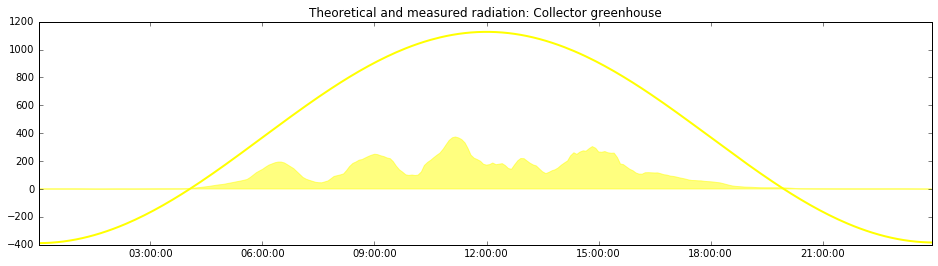

In [15]:
fig, ax = plt.subplots(1, sharex=True, figsize=(16,4))

# This is only to make clear how to index and select ranges:
# Note that the external variables have the same valule for both greenhouses
r0 = collector['RadTheor(0)'][xtime]
rad = collector['OutRad(0)'][xtime]

ax.plot( xtime, r0, color='yellow', linewidth=2.0, label='Theoretical Radiation');
ax.fill_between( np.array(xtime), y1=rad, y2=0, color='yellow', alpha=0.5, label='Measured Radiation' );
ax.set_title('Theoretical and measured radiation: Collector greenhouse');

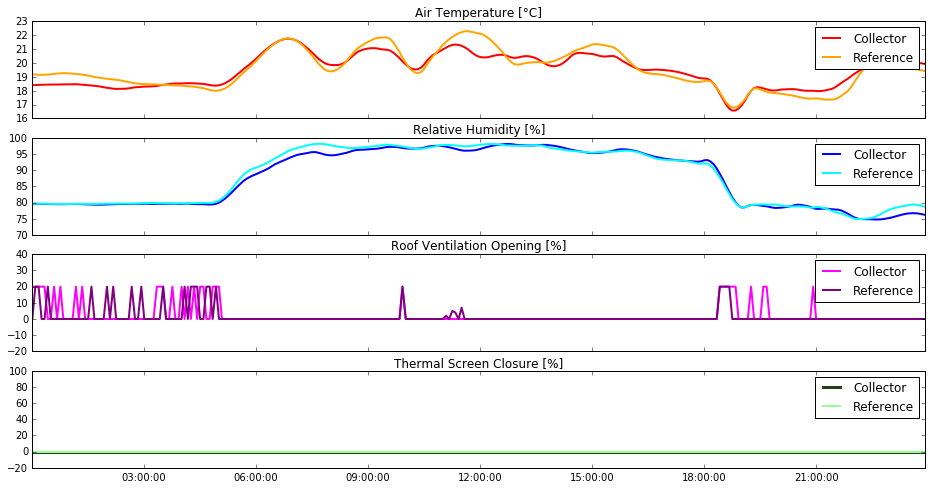

In [16]:

fig, axarr = plt.subplots(4, sharex=True, figsize=(16,8))

# This is only to make clear how to index and select ranges:
col_temp = collector['Temperature(0)'][xtime]
ref_temp = reference['Temperature(0)'][xtime]

col_rh = collector['RelHum(0)'][xtime]
ref_rh = reference['RelHum(0)'][xtime]

col_vent = collector['Ventilation(0)'][xtime]
ref_vent = reference['Ventilation(0)'][xtime]

col_screen = collector['Screening(0)'][xtime]
ref_screen = reference['Screening(0)'][xtime]


axarr[0].plot( xtime, col_temp, color='red', linewidth=2.0, label='Collector');
axarr[0].plot( xtime, ref_temp, color='orange', linewidth=2.0, label='Reference');
axarr[0].set_title('Air Temperature [°C]');
axarr[0].legend();

axarr[1].plot( xtime, col_rh, color='blue', linewidth=2.0, label='Collector');
axarr[1].plot( xtime, ref_rh, color='cyan', linewidth=2.0, label='Reference');
axarr[1].set_title('Relative Humidity [%]');
axarr[1].legend();

axarr[2].plot( xtime, col_vent, color='magenta', linewidth=2.0, label='Collector');
axarr[2].plot( xtime, ref_vent, color='#800080', linewidth=2.0, label='Reference');
axarr[2].set_title('Roof Ventilation Opening [%]');
axarr[2].legend();
axarr[2].set_ylim([-20,40]);

axarr[3].plot( xtime, col_screen, color='#254117', linewidth=3.0, label='Collector');
axarr[3].plot( xtime, ref_screen, color='#98FF98', linewidth=2.0, label='Reference');
axarr[3].set_title('Thermal Screen Closure [%]');
axarr[3].legend();
axarr[3].set_ylim([-20,100]);

## Simulation

### Recreating the networks

In [17]:
import pybrain
from pybrain.structure import RecurrentNetwork, FeedForwardNetwork, LinearLayer, SigmoidLayer, FullConnection
from IPython.display import Image
from pybrain.structure import connections

In [18]:
netF = FeedForwardNetwork()
netR = RecurrentNetwork()
netR2 = RecurrentNetwork()
    
    
inpF = LinearLayer(24)
hidF = SigmoidLayer(24)
outF = LinearLayer(2)

inpR = LinearLayer(8, name='in')
hidR = SigmoidLayer(8, name='hidden')
outR = LinearLayer(2, name='out')

inpR2 = LinearLayer(8, name='in2')
hidR2 = SigmoidLayer(8, name='hidden2')
outR2 = LinearLayer(2, name='out2')
    
netF.addInputModule(inpF)
netF.addModule(hidF)
netF.addOutputModule(outF)


netR.addInputModule(inpR)
netR.addModule(hidR)
netR.addOutputModule(outR)

netR2.addInputModule(inpR2)
netR2.addModule(hidR2)
netR2.addOutputModule(outR2)

#Feedforward connections

netF.addConnection(FullConnection(inpF,hidF))
netF.addConnection(FullConnection(hidF,outF))
netF.sortModules()

netR.addConnection(FullConnection(netR['in'],netR['hidden'], name='c1'))
netR.addConnection(FullConnection(netR['hidden'],netR['out'], name='c2'))
netR.sortModules()

netR2.addConnection(FullConnection(netR2['in2'],netR2['hidden2'], name='c3'))
netR2.addConnection(FullConnection(netR2['hidden2'],netR2['out2'], name='c4'))
netR2.sortModules()

#Recurrent connections

netR.addRecurrentConnection(FullConnection(netR['in'],netR['in'], name='cR1'))
netR.addRecurrentConnection(FullConnection(netR['hidden'],netR['hidden'], name='cR2'))
netR.addRecurrentConnection(FullConnection(netR['out'],netR['out'], name='cR3'))
netR.sortModules()

netR2.addRecurrentConnection(FullConnection(netR2['in2'],netR2['in2'], name='cR4'))
netR2.addRecurrentConnection(FullConnection(netR2['hidden2'],netR2['hidden2'], name='cR5'))
netR2.addRecurrentConnection(FullConnection(netR2['out2'],netR2['out2'], name='cR6'))
netR2.sortModules()

### Setting the weights

In [19]:
def set_weights(n,wf,wr): ## n es la red, wf es el arreglo de pesos FF, wr es el arreglo de pesos RN 
    n.reset()
    for mod in n.modules:
        for conn in n.connections[mod]:
            for cc in range(len(conn.params)):
                conn.params[cc]=wf[cc]
   
    if hasattr(n, "recurrentConns"):
        for rcon in n.recurrentConns:
            for rc in range(len(rcon.params)):
                rcon.params[rc]=wf[rc]
     

In [20]:
WF=getcsv2('netF.csv')
WR=getcsv2('netR.csv')
WR2=getcsv2('netR2.csv')

In [21]:
FF_weights=WF.get_values()
R_weights=WR.get_values()
R2_weights=WR2.get_values()

In [22]:
set_weights(netF,FF_weights[0],FF_weights[1])
set_weights(netR,R_weights[0],R_weights[1])
set_weights(netR2,R2_weights[0],R2_weights[1])

## Simulating on my birthday

In [1]:
mm = pd.read_csv( 'mm.csv', sep=',', names = [ x+1 for x in range(0,80)] )
indexm=(["maximos","minimos"])
mm.columns=cols
mm.index=indexm

NameError: name 'pd' is not defined

In [24]:
mm

,Record(1),Temperature(1),RelHum(1),Ventilation(1),Screening(1),Heating(1),Cooling(1),LAI(1),OutTemp(1),OutRelHum(1),...,Cooling(-3),LAI(-3),OutTemp(-3),OutRelHum(-3),OutRad(-3),OutWindVel(-3),HourAngle(-3),Declination(-3),Elevation(-3),RadTheor(-3)
maximos,NaN,35.849348,100.000000,100,100,282.71,84.35,2.37490,35.730715,99.553140,...,84.35,2.37490,35.730715,99.553140,1102.354796,19.06,1,23.450,60.990,1154.6
minimos,NaN,12.365276,29.823312,0,0,-98.98,-176.19,0.21708,-12.833602,20.989502,...,-176.19,0.21708,-12.833602,20.989502,-9.767520,0.00,-1,-18.628,-55.951,-1163.2


In [25]:
def norm(x,maxi,mini):
    Vnorm=(2*((x-mini)/(maxi-mini)))-1
    return Vnorm  

In [26]:
def a_norm(y,maxi,mini):
    a=y+1
    b=maxi-mini
    c=a*b
    d=c/2
    Anorm=d+mini
    return Anorm

In [27]:
#Ntest_col = pd.DataFrame(columns=testcol.columns,index=testtime.index)
#Ntest_ref = pd.DataFrame(columns=cols,index=testtime.index)

Ntest_col = pd.DataFrame(columns=testcol.columns,index=testtime.index)
Ntest_ref = pd.DataFrame(columns=testref.columns,index=testtime.index)

In [28]:
Ntest_col=pd.merge( testtime, Ntest_col, on = testtime['Record'] )
Ntest_ref=pd.merge( testtime, Ntest_ref, on = testtime['Record'] )

In [29]:

for n in range(1,testcol.shape[1]):
    ar=testcol[testcol.columns[n]]
    Ntest_col[Ntest_col.columns[n+10]]=norm(ar,mm[mm.columns[n]]["maximos"],mm[mm.columns[n]]["minimos"])

for n in range(1,testref.shape[1]):
    ar=testref[testref.columns[n]]
    Ntest_ref[Ntest_ref.columns[n+10]]=norm(ar,mm[mm.columns[n]]["maximos"],mm[mm.columns[n]]["minimos"])
    

In [30]:
Ntest_col.index = Ntest_col['DateTime']
Ntest_ref.index = Ntest_col['DateTime']

In [31]:
stest_col=np.array([Ntest_col['Temperature(-2)'][xtime],Ntest_col['RelHum(-2)'][xtime],\
            Ntest_col['Ventilation(-2)'][xtime],Ntest_col['Screening(-2)'][xtime], \
            Ntest_col['HourAngle(-2)'][xtime],Ntest_col['Declination(-2)'][xtime],\
            Ntest_col['Elevation(-2)'][xtime],Ntest_col['RadTheor(-2)'][xtime], \
            Ntest_col['Temperature(-1)'][xtime],Ntest_col['RelHum(-1)'][xtime],\
            Ntest_col['Ventilation(-1)'][xtime],Ntest_col['Screening(-1)'][xtime], \
            Ntest_col['HourAngle(-1)'][xtime],Ntest_col['Declination(-1)'][xtime],\
            Ntest_col['Elevation(-1)'][xtime],Ntest_col['RadTheor(-1)'][xtime], \
            Ntest_col['Temperature(0)'][xtime],Ntest_col['RelHum(0)'][xtime],\
            Ntest_col['Ventilation(0)'][xtime],Ntest_col['Screening(0)'][xtime], \
            Ntest_col['HourAngle(0)'][xtime],Ntest_col['Declination(0)'][xtime],\
            Ntest_col['Elevation(0)'][xtime],Ntest_col['RadTheor(0)'][xtime]]).T

ttest_col=np.array([Ntest_col['Temperature(1)'][xtime],Ntest_col['RelHum(1)'][xtime]]).T     


stest_ref=np.array([Ntest_ref['Temperature(-2)'][xtime],Ntest_ref['RelHum(-2)'][xtime],\
            Ntest_ref['Ventilation(-2)'][xtime],Ntest_ref['Screening(-2)'][xtime], \
            Ntest_ref['HourAngle(-2)'][xtime],Ntest_ref['Declination(-2)'][xtime],\
            Ntest_ref['Elevation(-2)'][xtime],Ntest_ref['RadTheor(-2)'][xtime], \
            Ntest_ref['Temperature(-1)'][xtime],Ntest_ref['RelHum(-1)'][xtime],\
            Ntest_ref['Ventilation(-1)'][xtime],Ntest_ref['Screening(-1)'][xtime], \
            Ntest_ref['HourAngle(-1)'][xtime],Ntest_ref['Declination(-1)'][xtime],\
            Ntest_ref['Elevation(-1)'][xtime],Ntest_ref['RadTheor(-1)'][xtime], \
            Ntest_ref['Temperature(0)'][xtime],Ntest_ref['RelHum(0)'][xtime],\
            Ntest_ref['Ventilation(0)'][xtime],Ntest_ref['Screening(0)'][xtime], \
            Ntest_ref['HourAngle(0)'][xtime],Ntest_ref['Declination(0)'][xtime],\
            Ntest_ref['Elevation(0)'][xtime],Ntest_ref['RadTheor(0)'][xtime]]).T

ttest_ref=np.array([Ntest_ref['Temperature(1)'][xtime],Ntest_ref['RelHum(1)'][xtime]]).T     


In [32]:
stest_colR=np.array([Ntest_col['Temperature(0)'][xtime],Ntest_col['RelHum(0)'][xtime],\
            Ntest_col['Ventilation(0)'][xtime],Ntest_col['Screening(0)'][xtime], \
            Ntest_col['HourAngle(0)'][xtime],Ntest_col['Declination(0)'][xtime],\
            Ntest_col['Elevation(0)'][xtime],Ntest_col['RadTheor(0)'][xtime]]).T

ttest_colR=np.array([Ntest_col['Temperature(1)'][xtime],Ntest_col['RelHum(1)'][xtime]]).T  


stest_refR=np.array([Ntest_ref['Temperature(0)'][xtime],Ntest_ref['RelHum(0)'][xtime],\
            Ntest_ref['Ventilation(0)'][xtime],Ntest_ref['Screening(0)'][xtime], \
            Ntest_ref['HourAngle(0)'][xtime],Ntest_ref['Declination(0)'][xtime],\
            Ntest_ref['Elevation(0)'][xtime],Ntest_ref['RadTheor(0)'][xtime]]).T

ttest_refR=np.array([Ntest_ref['Temperature(1)'][xtime],Ntest_ref['RelHum(1)'][xtime]]).T 

## Feedforward network

In [33]:

#_______________________________Collector Greenhouse__________________________

sim_col=np.array([])
for inps in (stest_col):
    netF.reset()
    sim_col=np.append(sim_col,netF.activate( inps ))

sim_col=np.reshape(sim_col,[len(ttest_col),2])    

#______________________________Reference Greenhouse___________________________

sim_ref=np.array([])
for inps in (stest_ref):
    netF.reset()
    sim_ref=np.append(sim_ref,netF.activate( inps ))
    
sim_ref=np.reshape(sim_ref,[len(ttest_ref),2])    


In [34]:
temperature_col=np.array([])
temperature_ref=np.array([])

RelHum_col=np.array([])
RelHum_ref=np.array([])

for n in range(0,sim_col.shape[0]):
    sim_col[n][0]=a_norm(sim_col[n][0],mm['Temperature(1)']["maximos"],mm['Temperature(1)']["minimos"])
    sim_ref[n][0]=a_norm(sim_ref[n][0],mm['Temperature(1)']["maximos"],mm['Temperature(1)']["minimos"])
    temperature_col=np.append(temperature_col,sim_col[n][0])
    temperature_ref=np.append(temperature_ref,sim_ref[n][0])
    
for n in range(0,sim_col.shape[0]):
    sim_col[n][1]=a_norm(sim_col[n][1],mm['RelHum(1)']["maximos"],mm['RelHum(1)']["minimos"])
    sim_ref[n][1]=a_norm(sim_ref[n][1],mm['RelHum(1)']["maximos"],mm['RelHum(1)']["minimos"])
    RelHum_col=np.append(RelHum_col,sim_col[n][1])
    RelHum_ref=np.append(RelHum_ref,sim_ref[n][1])
    

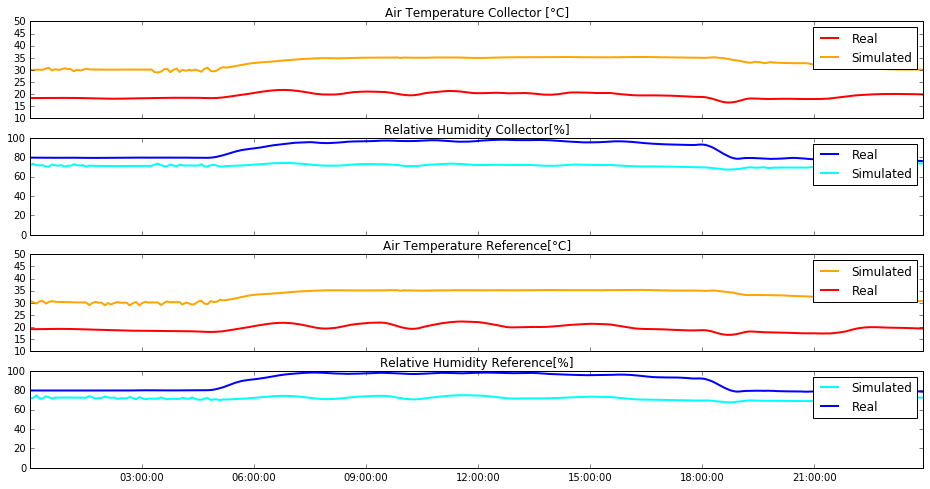

In [35]:
fig1, axarr1 = plt.subplots(4, sharex=True, figsize=(16,8))

# This is only to make clear how to index and select ranges:
col_temp = collector['Temperature(1)'][xtime]
ref_temp = reference['Temperature(1)'][xtime]

col_rh = collector['RelHum(1)'][xtime]
ref_rh = reference['RelHum(1)'][xtime]



axarr1[0].plot( xtime, col_temp, color='red', linewidth=2.0, label='Real');
axarr1[0].plot( xtime, temperature_col, color='orange', linewidth=2.0, label='Simulated');
axarr1[0].set_title('Air Temperature Collector [°C]');
axarr1[0].set_ylim([10,50]);
axarr1[0].legend();

axarr1[1].plot( xtime, col_rh, color='blue', linewidth=2.0, label='Real');
axarr1[1].plot( xtime, RelHum_col, color='cyan', linewidth=2.0, label='Simulated');
axarr1[1].set_title('Relative Humidity Collector[%]');
axarr1[1].set_ylim([0,100]);
axarr1[1].legend();

axarr1[2].plot( xtime, temperature_ref, color='orange', linewidth=2.0, label='Simulated');
axarr1[2].plot( xtime, ref_temp, color='red', linewidth=2.0, label='Real');
axarr1[2].set_title('Air Temperature Reference[°C]');
axarr1[2].set_ylim([10,50]);
axarr1[2].legend();

axarr1[3].plot( xtime, RelHum_ref, color='cyan', linewidth=2.0, label='Simulated');
axarr1[3].plot( xtime, ref_rh, color='blue', linewidth=2.0, label='Real');
axarr1[3].set_title('Relative Humidity Reference[%]');
axarr1[3].set_ylim([0,100]);
axarr1[3].legend();

## Recurrent network 1

In [36]:

#_______________________________Collector Greenhouse__________________________

sim_colR=np.array([])
for inps in (stest_colR):
    netR.reset()
    sim_colR=np.append(sim_colR,netR.activate( inps ))

sim_colR=np.reshape(sim_colR,[len(ttest_colR),2])    

#______________________________Reference Greenhouse___________________________

sim_refR=np.array([])
for inps in (stest_refR):
    netR.reset()
    sim_refR=np.append(sim_refR,netR.activate( inps ))
    
sim_refR=np.reshape(sim_refR,[len(ttest_refR),2])    


In [37]:
temperature_colR=np.array([])
temperature_refR=np.array([])

RelHum_colR=np.array([])
RelHum_refR=np.array([])

for n in range(0,sim_colR.shape[0]):
    sim_colR[n][0]=a_norm(sim_colR[n][0],mm['Temperature(1)']["maximos"],mm['Temperature(1)']["minimos"])
    sim_refR[n][0]=a_norm(sim_refR[n][0],mm['Temperature(1)']["maximos"],mm['Temperature(1)']["minimos"])
    temperature_colR=np.append(temperature_colR,sim_colR[n][0])
    temperature_refR=np.append(temperature_refR,sim_refR[n][0])
    
for n in range(0,sim_colR.shape[0]):
    sim_colR[n][1]=a_norm(sim_colR[n][1],mm['RelHum(1)']["maximos"],mm['RelHum(1)']["minimos"])
    sim_refR[n][1]=a_norm(sim_refR[n][1],mm['RelHum(1)']["maximos"],mm['RelHum(1)']["minimos"])
    RelHum_colR=np.append(RelHum_colR,sim_colR[n][1])
    RelHum_refR=np.append(RelHum_refR,sim_refR[n][1])

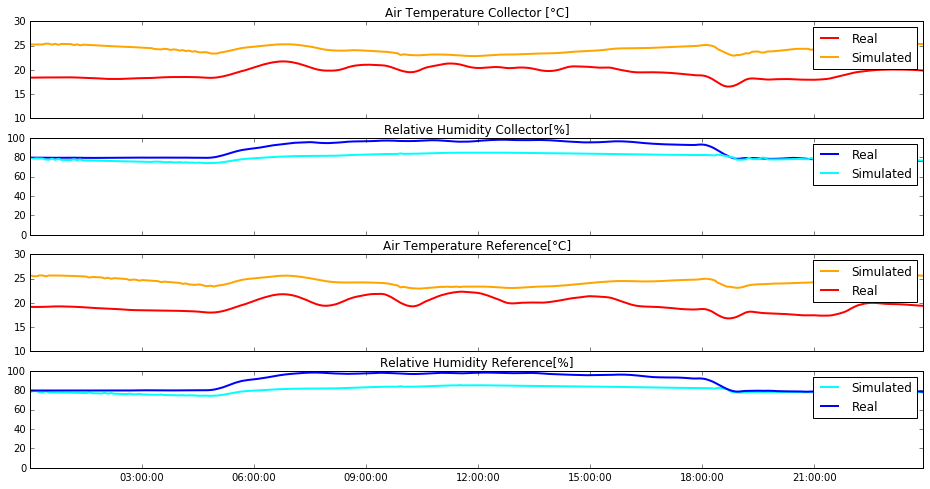

In [38]:
fig2, axarr2 = plt.subplots(4, sharex=True, figsize=(16,8))

# This is only to make clear how to index and select ranges:
col_temp = collector['Temperature(1)'][xtime]
ref_temp = reference['Temperature(1)'][xtime]

col_rh = collector['RelHum(1)'][xtime]
ref_rh = reference['RelHum(1)'][xtime]



axarr2[0].plot( xtime, col_temp, color='red', linewidth=2.0, label='Real');
axarr2[0].plot( xtime, temperature_colR, color='orange', linewidth=2.0, label='Simulated');
axarr2[0].set_title('Air Temperature Collector [°C]');
axarr2[0].set_ylim([10,30]);
axarr2[0].legend();

axarr2[1].plot( xtime, col_rh, color='blue', linewidth=2.0, label='Real');
axarr2[1].plot( xtime, RelHum_colR, color='cyan', linewidth=2.0, label='Simulated');
axarr2[1].set_title('Relative Humidity Collector[%]');
axarr2[1].set_ylim([0,100]);
axarr2[1].legend();

axarr2[2].plot( xtime, temperature_refR, color='orange', linewidth=2.0, label='Simulated');
axarr2[2].plot( xtime, ref_temp, color='red', linewidth=2.0, label='Real');
axarr2[2].set_title('Air Temperature Reference[°C]');
axarr2[2].set_ylim([10,30]);
axarr2[2].legend();

axarr2[3].plot( xtime, RelHum_refR, color='cyan', linewidth=2.0, label='Simulated');
axarr2[3].plot( xtime, ref_rh, color='blue', linewidth=2.0, label='Real');
axarr2[3].set_title('Relative Humidity Reference[%]');
axarr2[3].set_ylim([0,100]);
axarr2[3].legend();

## Recurrent Network 2

In [39]:
def mse(predictions, targets):
    return ((predictions - targets) ** 2).mean()

In [41]:

#_______________________________Collector Greenhouse__________________________

sim_colR2=np.array([])
for inps in (stest_colR):
    netR2.reset()
    sim_colR2=np.append(sim_colR2,netR2.activate( inps ))

sim_colR2=np.reshape(sim_colR2,[len(ttest_colR),2])    
    
errorTestR2_col=mse(sim_colR2,ttest_refR)

temperature_errorTestR2_col=mse(sim_colR2[0],ttest_refR[0])
humidity_errorTestR2_col=mse(sim_colR2[1],ttest_refR[1])


#______________________________Reference Greenhouse___________________________

sim_refR2=np.array([])
for inps in (stest_refR):
    netR2.reset()
    sim_refR2=np.append(sim_refR2,netR2.activate( inps ))

sim_refR2=np.reshape(sim_refR2,[len(ttest_refR),2])    

errorTestR2_ref=mse(sim_refR2,ttest_refR)

temperature_errorTestR2_ref=mse(sim_refR2[0],ttest_refR[0])
humidity_errorTestR2_ref=mse(sim_refR2[1],ttest_refR[1])
    



In [44]:
print(errorTestR2_col,errorTestR2_ref)
print(temperature_errorTestR2_col,temperature_errorTestR2_ref)
print(humidity_errorTestR2_col,humidity_errorTestR2_ref)

0.263781391704 0.264822213879
0.32697996189 0.364408233128
0.325439889322 0.303624266618


In [ ]:
temperature_colR2=np.array([])
temperature_refR2=np.array([])

RelHum_colR2=np.array([])
RelHum_refR2=np.array([])

for n in range(0,sim_colR2.shape[0]):
    sim_colR2[n][0]=a_norm(sim_colR2[n][0],mm['Temperature(1)']["maximos"],mm['Temperature(1)']["minimos"])
    sim_refR2[n][0]=a_norm(sim_refR2[n][0],mm['Temperature(1)']["maximos"],mm['Temperature(1)']["minimos"])
    temperature_colR2=np.append(temperature_colR2,sim_colR2[n][0])
    temperature_refR2=np.append(temperature_refR2,sim_refR2[n][0])
    
for n in range(0,sim_colR.shape[0]):
    sim_colR2[n][1]=a_norm(sim_colR2[n][1],mm['RelHum(1)']["maximos"],mm['RelHum(1)']["minimos"])
    sim_refR2[n][1]=a_norm(sim_refR2[n][1],mm['RelHum(1)']["maximos"],mm['RelHum(1)']["minimos"])
    RelHum_colR2=np.append(RelHum_colR2,sim_colR2[n][1])
    RelHum_refR2=np.append(RelHum_refR2,sim_refR2[n][1])

In [ ]:
fig3, axarr3 = plt.subplots(4, sharex=True, figsize=(16,8))

# This is only to make clear how to index and select ranges:
col_temp = collector['Temperature(1)'][xtime]
ref_temp = reference['Temperature(1)'][xtime]

col_rh = collector['RelHum(1)'][xtime]
ref_rh = reference['RelHum(1)'][xtime]



axarr3[0].plot( xtime, col_temp, color='red', linewidth=2.0, label='Real');
axarr3[0].plot( xtime, temperature_colR2, color='orange', linewidth=2.0, label='Simulated');
axarr3[0].set_title('Air Temperature Collector [°C]');
axarr3[0].set_ylim([10,30]);
axarr3[0].legend();

axarr3[1].plot( xtime, col_rh, color='blue', linewidth=2.0, label='Real');
axarr3[1].plot( xtime, RelHum_colR2, color='cyan', linewidth=2.0, label='Simulated');
axarr3[1].set_title('Relative Humidity Collector[%]');
axarr3[1].set_ylim([0,100]);
axarr3[1].legend();

axarr3[2].plot( xtime, temperature_refR2, color='orange', linewidth=2.0, label='Simulated');
axarr3[2].plot( xtime, ref_temp, color='red', linewidth=2.0, label='Real');
axarr3[2].set_title('Air Temperature Reference[°C]');
axarr3[2].set_ylim([10,30]);
axarr3[2].legend();

axarr3[3].plot( xtime, RelHum_refR2, color='blue', linewidth=2.0, label='Simulated');
axarr3[3].plot( xtime, ref_rh, color='cyan', linewidth=2.0, label='Real');
axarr3[3].set_title('Relative Humidity Reference[%]');
axarr3[3].set_ylim([0,100]);
axarr3[3].legend();

## The three networks together

### Collector

In [ ]:
fig4, axarr4 = plt.subplots(2, sharex=True, figsize=(16,8))

# This is only to make clear how to index and select ranges:
col_temp = collector['Temperature(1)'][xtime]

col_rh = collector['RelHum(1)'][xtime]
col_vent = collector['Ventilation(1)'][xtime]




axarr4[0].plot( xtime, col_temp, color='black', linewidth=2.0, label='Real');
axarr4[0].plot( xtime, temperature_col, color='yellow', linewidth=2.0, label='Feedforward');
axarr4[0].plot( xtime, temperature_colR, color='orange', linewidth=2.0, label='Recurrent 1');
axarr4[0].plot( xtime, temperature_colR2, color='red', linewidth=2.0, label='Recurrent 2');
axarr4[0].fill_between( np.array(xtime), y1=col_vent, y2=0, color='#FF9F80', alpha=0.5, label='Ventilation Opening' );
axarr4[0].set_title('Air Temperature Collector [°C]');
axarr4[0].set_ylim([0,37]);
axarr4[0].legend();

axarr4[1].plot( xtime, col_rh, color='black', linewidth=2.0, label='Real');
axarr4[1].plot( xtime, RelHum_col, color='#80E0FF', linewidth=2.0, label='Feedforward');
axarr4[1].plot( xtime, RelHum_colR, color='#3090C7', linewidth=2.0, label='Recurrent 1');
axarr4[1].plot( xtime, RelHum_colR2, color='#0041C2', linewidth=2.0, label='Recurrent 2');
axarr4[1].fill_between( np.array(xtime), y1=col_vent, y2=0, color='#FF9F80', alpha=0.5, label='Ventilation Opening' );
axarr4[1].set_title('Relative Humidity Collector[%]');
axarr4[1].set_ylim([0,150]);
axarr4[1].legend();

In [ ]:
fig5, axarr5 = plt.subplots(2, sharex=True, figsize=(16,8))

# This is only to make clear how to index and select ranges:
ref_temp = reference['Temperature(1)'][xtime]

ref_rh = reference['RelHum(1)'][xtime]

ref_vent = reference['Ventilation(1)'][xtime]



axarr5[0].plot( xtime, ref_temp, color='black', linewidth=2.0, label='Real');
axarr5[0].plot( xtime, temperature_ref, color='yellow', linewidth=2.0, label='Feedforward');
axarr5[0].plot( xtime, temperature_refR, color='orange', linewidth=2.0, label='Recurrent 1');
axarr5[0].plot( xtime, temperature_refR2, color='red', linewidth=2.0, label='Recurrent 2');
axarr5[0].fill_between( np.array(xtime), y1=col_vent, y2=0, color='#FF9F80', alpha=0.5, label='Ventilation Opening' );
axarr5[0].set_title('Air Temperature Collector [°C]');
axarr5[0].set_ylim([0,37]);
axarr5[0].legend();

axarr5[1].plot( xtime, ref_rh, color='black', linewidth=2.0, label='Real');
axarr5[1].plot( xtime, RelHum_ref, color='cyan', linewidth=2.0, label='Feedforward');
axarr5[1].plot( xtime, RelHum_refR, color='blue', linewidth=2.0, label='Recurrent 1');
axarr5[1].plot( xtime, RelHum_refR2, color='#0000A0', linewidth=2.0, label='Recurrent 2');
axarr5[1].fill_between( np.array(xtime), y1=col_vent, y2=0, color='#FF9F80', alpha=0.5, label='Ventilation Opening' );
axarr5[1].set_title('Relative Humidity Collector[%]');
axarr5[1].set_ylim([0,150]);
axarr5[1].legend();